# Blackboard for objects

In [1]:
import nbimporter
from teams import Team, Match
from players import Player
from utils import FIFA
from collections import defaultdict
import numpy as np

Importing Jupyter notebook from teams.ipynb
Importing Jupyter notebook from players.ipynb
Importing Jupyter notebook from utils.ipynb


In [2]:
football = '../data/fifa/fifa_2018.csv'
data = FIFA.load(football)

In [3]:
H = Team('Juventus', data)
A = Team('Genoa', data)

In [4]:
H.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [5]:
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [6]:
match = Match(H, A, duration=90)

In [7]:
match.kickoff(verbose=True, sleep=0)

min 1: C. Marchisio is in possession
min 1: Miguel Veloso intercept passage of C. Marchisio
min 2: Miguel Veloso is in possession
min 2: SHOOT of Miguel Veloso
min 2: Miguel Veloso shoots out
min 3: G. Buffon is in possession
min 3: G. Buffon fails passing to M. Mandžukić
min 4: D. Lazović is in possession
min 4: SHOOT of D. Lazović
min 4: G. Buffon saves on D. Lazović
min 5: G. Buffon is in possession
min 5: G. Buffon fails passing to G. Chiellini
min 6: G. Pandev is in possession
min 6: G. Chiellini intercept passage of G. Pandev
min 7: G. Chiellini is in possession
min 7: G. Chiellini passes to A. Barzagli
min 8: A. Barzagli is in possession
min 8: A. Barzagli fails passing to G. Chiellini
min 9: G. Pandev is in possession
min 9: SHOOT of G. Pandev
min 9: G. Pandev shoots out
min 10: G. Buffon is in possession
min 10: G. Buffon fails passing to G. Chiellini
min 11: G. Lapadula is in possession
min 11: G. Lapadula fails passing to D. Lazović
min 12: M. Benatia is in possession
min 12

In [8]:
print (match.score)
print (["{} ({}')".format(p.name, m) for m, p in match.scorers])

{'Juventus': 3, 'Genoa': 2}
["G. Higuaín (31')", "G. Higuaín (34')", "G. Pandev (42')", "G. Lapadula (65')", "G. Higuaín (72')"]


## Stats

In [9]:
H = Team('Juventus', data)
A = Team('FC Barcelona', data)
H.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

winners = {H.name: 0, A.name: 0, 'X': 0}
scorers = defaultdict(lambda: 0)
for m in range(100):
    match = Match(H, A, duration=90)
    match.kickoff(verbose=False, sleep=0)
    if match.score[H.name] > match.score[A.name]:
        winners[H.name] += 1
    elif match.score[A.name] > match.score[H.name]:
        winners[A.name] += 1
    else:
        winners['X'] += 1
    for m, p in match.scorers:
        scorers[p.name] += 1

In [10]:
print (winners)

{'Juventus': 36, 'FC Barcelona': 38, 'X': 26}


In [11]:
for k, v in sorted(scorers.items(), key=lambda x: -x[1]):
    print (k, v)

L. Messi 35
L. Suárez 34
G. Higuaín 34
M. Mandžukić 31
O. Dembélé 24
P. Dybala 18
Iniesta 9
M. Pjanić 8
B. Matuidi 7
I. Rakitić 6
Sergio Busquets 6
C. Marchisio 6
A. Barzagli 4
Alex Sandro 4
M. Benatia 4
S. Umtiti 3
Jordi Alba 3
Nélson Semedo 2
G. Chiellini 1
Piqué 1


# Visualization

In [12]:
football = '../data/fifa/fifa_2018.csv'
data = FIFA.load(football)
H = Team('Juventus', data)
A = Team('Napoli', data)
H.selection(module={Player.DEF: 4, Player.MID: 4, Player.ATT: 2})
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [13]:
match = Match(H, A, duration=90)

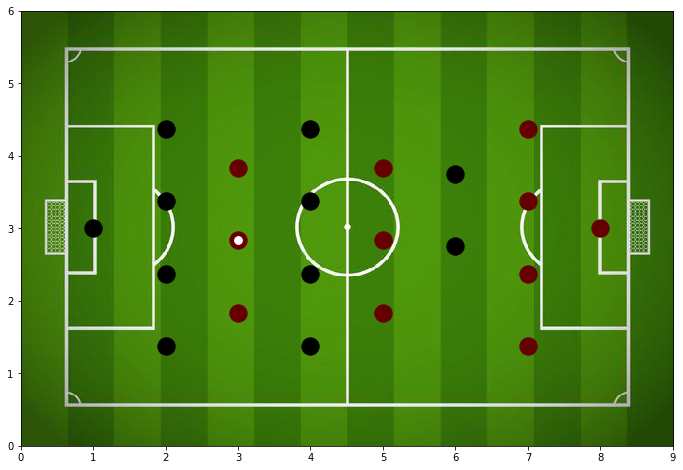

min 90: L. Insigne is in possession
min 90: M. Benatia intercept passage of L. Insigne


In [14]:
match.kickoff(show=True, sleep=2, verbose=True)

In [15]:
print (match.score)

{'Juventus': 1, 'Napoli': 3}


In [16]:
print (match.scorers)

[(22, P. Dybala, 3, A: 0.835, D: 0.18, P: 0.77), (62, D. Mertens, 3, A: 0.825, D: 0.36666666666666664, P: 0.775), (66, L. Insigne, 3, A: 0.715, D: 0.20666666666666667, P: 0.78), (81, D. Mertens, 3, A: 0.825, D: 0.36666666666666664, P: 0.775)]
